In [1]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('../data/final_limpio.csv')
df.head(2)

,Unnamed: 0,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,0,680565,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,83194.0,Married,Star,4462.45,Standard,2013,6,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,1,680565,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,83194.0,Married,Star,4462.45,Standard,2013,6,NaN,NaN,2017,2,8,0,8,784,78.0,0,0


****Fase 2: Visualización****

2.1. Cómo se distribuye la cantidad de vuelos reservados por mes durante el año

In [ ]:
# Enrollment Month y Total Flights

df_vuelos_por_meses = df.groupby('Enrollment Month')[['Total Flights']].sum()
df_vuelos_por_meses.head(20)

,Total Flights
Enrollment Month,
1,13894
2,20376
3,20278
4,19326
5,18153
6,24766
7,22039
8,19997
9,22904


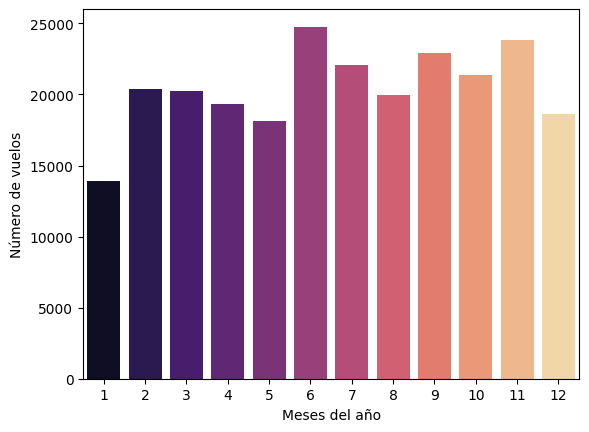

In [ ]:
sns.barplot(x = 'Enrollment Month', 
            y = 'Total Flights',
            data = df_vuelos_por_meses,            
            palette = 'magma',
            ci = None) # Para que no ponga la rayita del medio
plt.xlabel('Meses del año')
plt.ylabel('Número de vuelos');
# El mes en el que menos se vuela es enero y el que más, junio.
# También se vuela más en la segunda mitad del año que el la primera, 
# hasta el mes de diciembre que tiene una gran caída

2.2. ¿Existe relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [ ]:
# 'Distance', 'Points Accumulated'

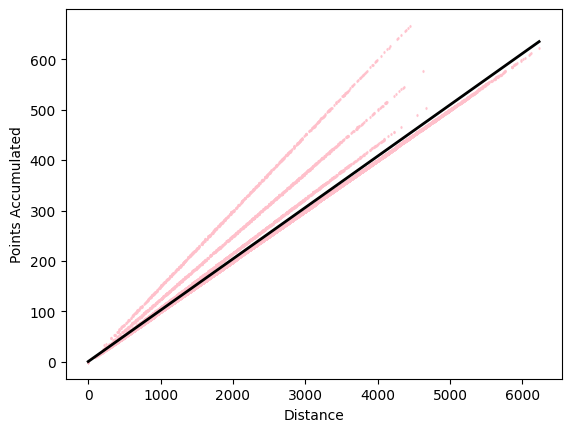

In [ ]:
sns.regplot(x = 'Distance', 
            y = 'Points Accumulated',
            data = df,
            marker= 'd',
            line_kws={'color':'black', 'linewidth':2},
            scatter_kws ={'color':'pink', 's':1});  
     
# Claramente se relacionan: Tienen una proporcion ascendente        
      

2.3. Distribución de los clientes por provincias o estados

In [38]:
#'Province' , 'Loyalty Number'
df_clientes_provincias = df.groupby('Province')[['Loyalty Number']].count()
df_clientes_provincias.head(20)

,Loyalty Number
Province,
Alberta,2783
British Columbia,12691
Manitoba,1824
New Brunswick,1536
Newfoundland,621
Nova Scotia,1272
Ontario,16019
Prince Edward Island,240
Quebec,9736


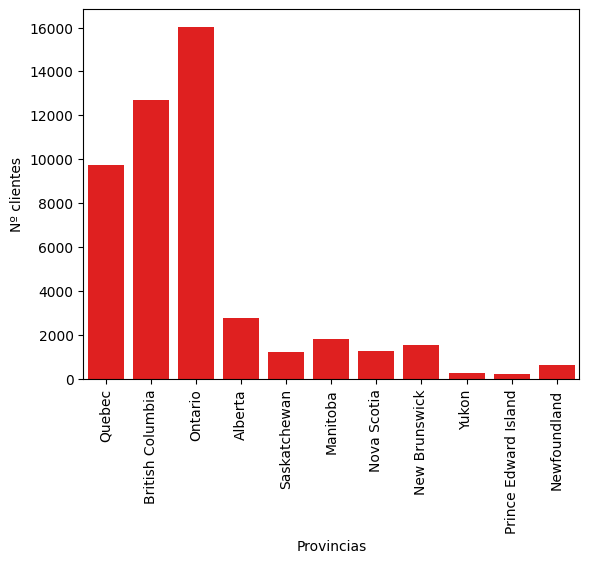

In [ ]:
sns.countplot(x = 'Province', 
              data = df,
              color = "r")
#rotamos el eje x para que se lean los nombres
plt.xticks(rotation = 90)
 
plt.xlabel("Provincias")
plt.ylabel("Nº clientes");

# El origen de los clientes es mayoritariamente de Ontario, British Columbia y Quebec

2.4. Comparación del salario promedio entre los diferentes niveles educativos de los clientes

In [50]:
# 'Salary' , 'Education'
df_salario_educacion = df.groupby('Education')[['Salary']].mean()
df_salario_educacion.head(20)

,Salary
Education,
Bachelor,72537.895523
College,78782.822880
Doctor,178261.113924
High School or Below,60186.637363
Master,107501.269046


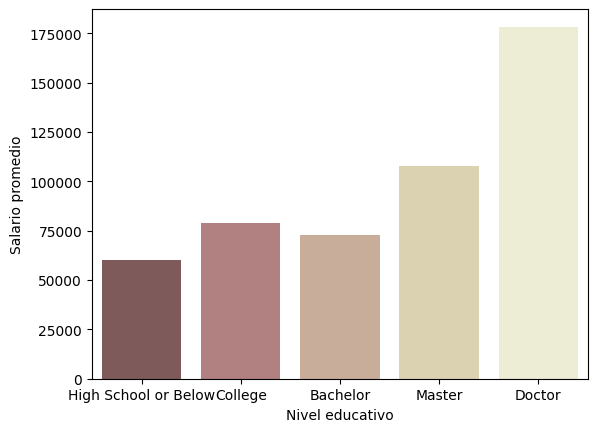

In [ ]:
sns.barplot(x = 'Education', 
            y = 'Salary',
            data = df_salario_educacion,            
            palette = 'pink',
            ci = None, # Para que no ponga la rayita del medio
            order = ['High School or Below','College', 'Bachelor', 'Master', 'Doctor'])
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio');

# Cuanto mayor es el nivel educativo, mayor es el sueldo de los clientes

2.5. Proporción de clientes con los diferentes tipos de tarjetas de fidelidad

In [56]:
df.columns

Index(['Unnamed: 0', 'Loyalty Number', 'Country', 'Province', 'City',
       'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status',
       'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [ ]:
#'Enrollment Type', 'Loyalty Number'
df_Enr_Type = df.groupby('Enrollment Type')['Loyalty Number'].count().reset_index()
df_Enr_Type

,Enrollment Type,Loyalty Number
0,2018 Promotion,2824
1,Standard,45431


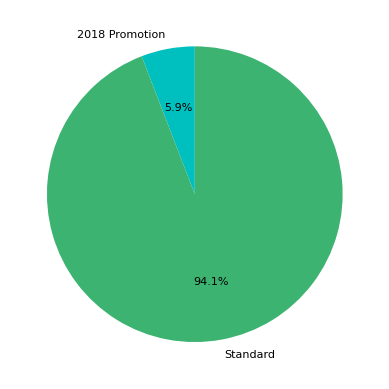

In [ ]:
colores = ['c', 'mediumseagreen']
plt.pie('Loyalty Number', labels= 'Enrollment Type',
        data = df_Enr_Type, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

# La tarjeta normal es la standard, por eso la proporción es muchísimo mayor.
# La otra tarjeta sería una promocional del año 2018 y ya no hubo mas

2.6. Cómo se distribuyen los clientes según su estado civil y género

In [60]:
# 'Gender', 'Marital Status'
df_gender = df.groupby('Gender')['Loyalty Number'].count().reset_index()
df_gender

,Gender,Loyalty Number
0,Female,24942
1,Male,23313


In [61]:
df_mstatus = df.groupby('Marital Status')['Loyalty Number'].count().reset_index()
df_mstatus

,Marital Status,Loyalty Number
0,Divorced,7557
1,Married,27474
2,Single,13224


In [66]:
df_mstatus_gender = df.groupby(['Marital Status','Gender'])['Loyalty Number'].count().reset_index()
df_mstatus_gender['mstatus_gender'] = df_mstatus_gender['Marital Status'] +'-'+ df_mstatus_gender['Gender']
df_mstatus_gender

,Marital Status,Gender,Loyalty Number,mstatus_gender
0,Divorced,Female,4029,Divorced-Female
1,Divorced,Male,3528,Divorced-Male
2,Married,Female,14127,Married-Female
3,Married,Male,13347,Married-Male
4,Single,Female,6786,Single-Female
5,Single,Male,6438,Single-Male


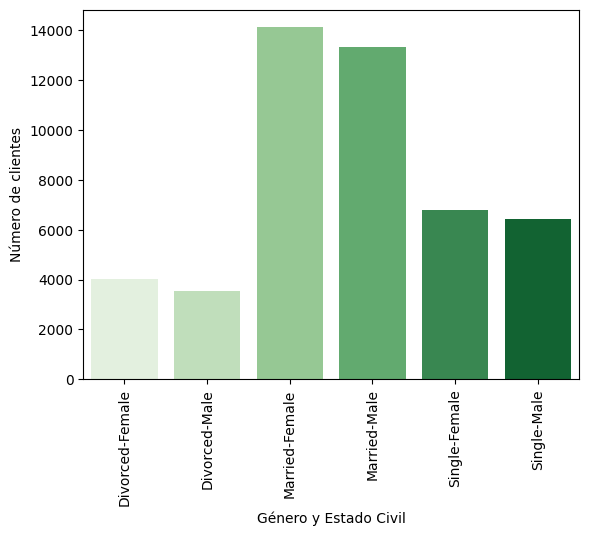

In [ ]:
sns.barplot(x = 'mstatus_gender', 
            y = 'Loyalty Number',
            data = df_mstatus_gender,            
            palette = 'Greens',
            ci = None) # Para que no ponga la rayita del medio
plt.xticks(rotation = 90)            
plt.xlabel('Género y Estado Civil')
plt.ylabel('Número de clientes');

# Los clientes casados son los que más viajan. 
# Y para cualquier estado civil, las mujeres viajan más que los hombres